# Airline Passenger Satisfaction Classification Project ✈️

## Part 1: Exploratory Data Analysis (EDA) and Data Cleaning 🧑‍🔬
**Objective:** To understand the dataset and perform necessary cleaning and preprocessing to prepare it for modeling.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
df = pd.read_csv("data/airline_passenger_satisfaction.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df = df.drop(columns = 'Unnamed: 0')

In [7]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [9]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


### Missing Values

In [11]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
# Handling misisng values in 'Arrival Delay in Minutes'
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [13]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Univariate & Bivariate Analysis

C:\Users\kondu\AppData\Local\Temp\ipykernel_29980\2125177369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'satisfaction', palette = ['red', 'green'])


Text(0.5, 0, 'Satisfaction')

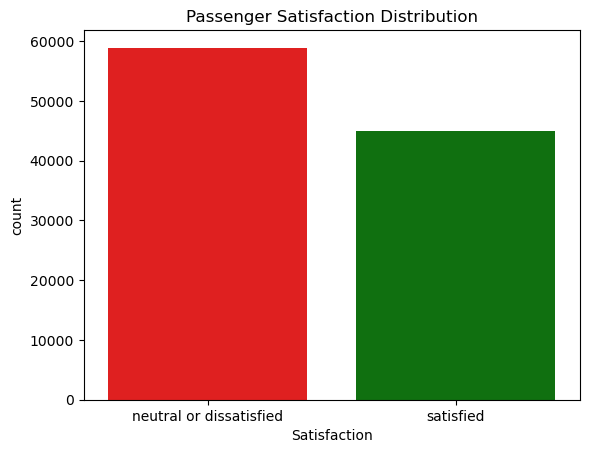

In [15]:
# Target Variable Exploration (satisfaction)
sns.countplot(data = df, x = 'satisfaction', palette = ['red', 'green'])
plt.title("Passenger Satisfaction Distribution")
plt.xlabel("Satisfaction")

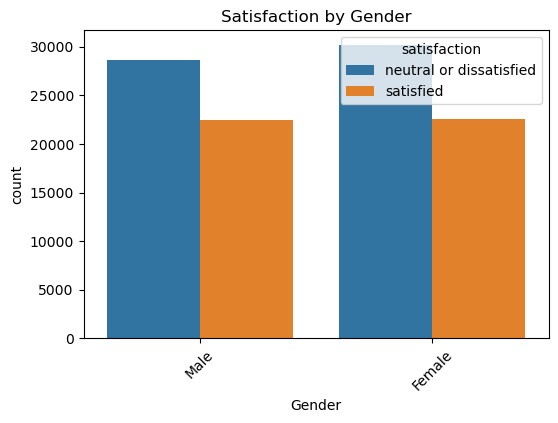

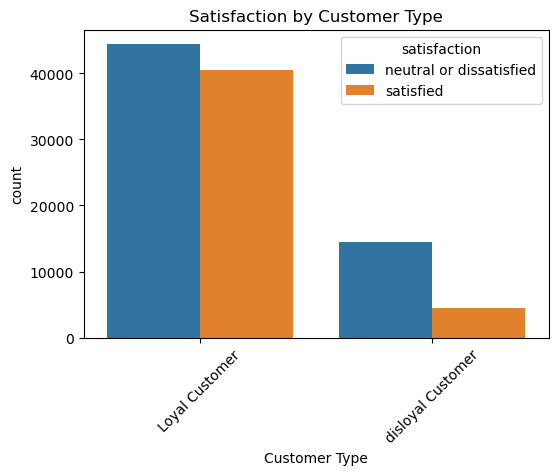

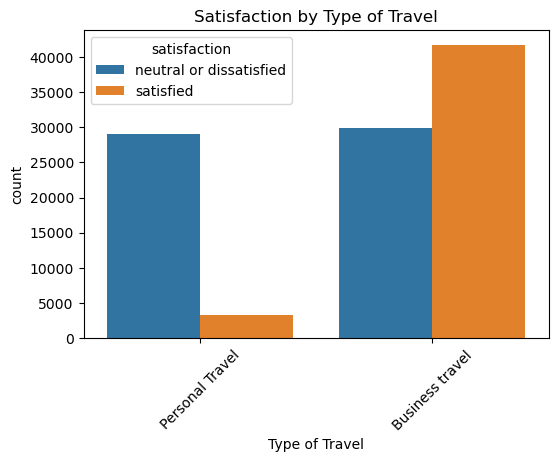

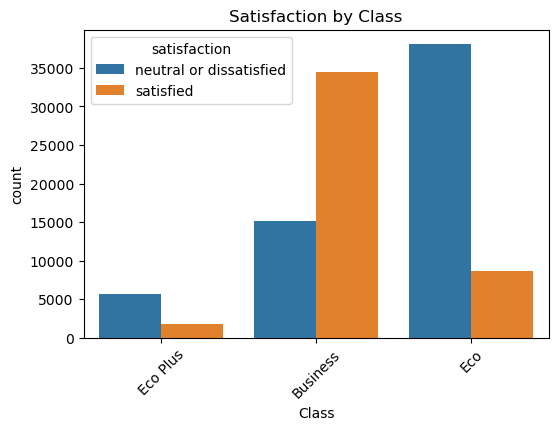

In [16]:
# Categorical Features vs. Satisfaction
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for feature in cat_features:
    plt.figure(figsize = (6,4))
    sns.countplot(data = df, x = feature, hue = 'satisfaction')
    plt.title(f"Satisfaction by {feature}")
    plt.xticks(rotation = 45)

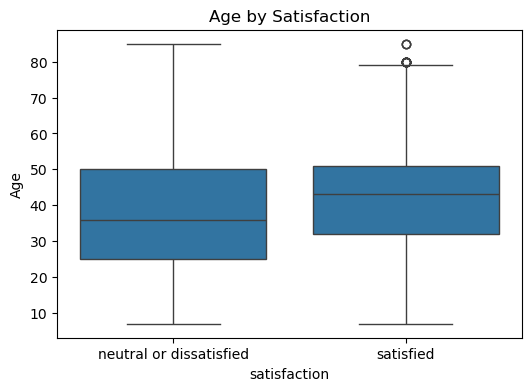

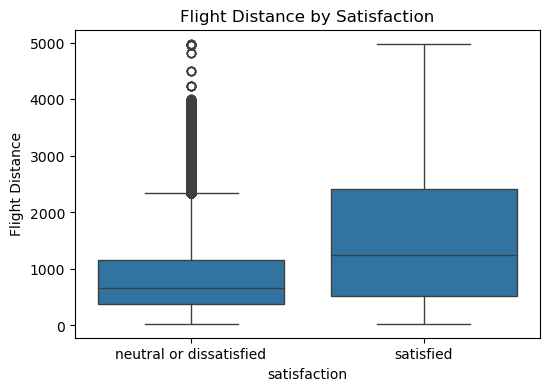

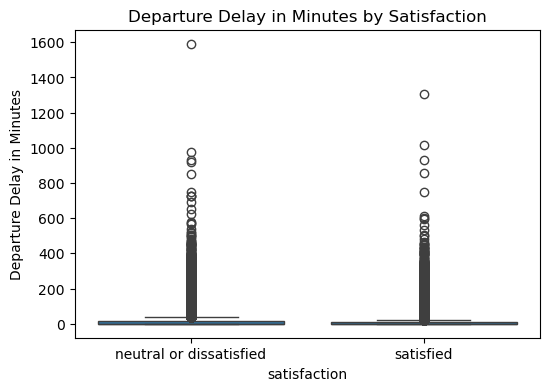

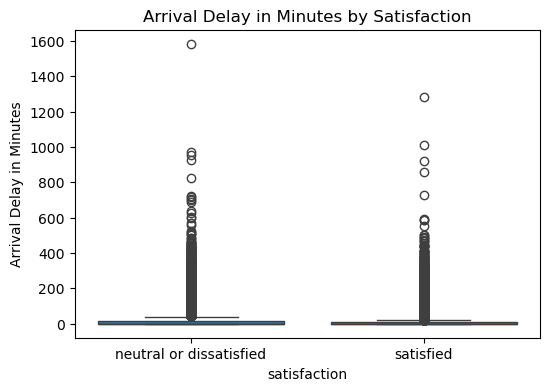

In [17]:
# Numerical Features vs. Satisfaction
num_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for feature in num_features:
    plt.figure(figsize = (6,4))
    sns.boxplot(data = df, x = 'satisfaction', y = feature)
    plt.title(f"{feature} by Satisfaction")

**Outlier Detection:**

From the above box plots, we have detected outliers and decided to keep them, because:

1. Here outliers are real data: In the airlines, extreme delays, long flights, or older passengers are genuine cases, not measurement errors.

2. Classification models like Random Forests or XGBoost handle outliers well. Tree-based models aren’t affected as much by extreme values. Removing them can even reduce accuracy.

3. They may help predict dissatisfaction, passengers delayed by 1000+ minutes are almost certainly dissatisfied. Removing them would hide key patterns.

4. The dataset is large enough (100K+ rows) to absorb outliers, so their influence is statistically smaller, but still useful for learning.

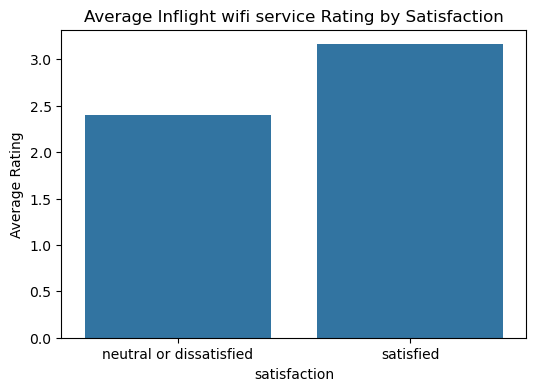

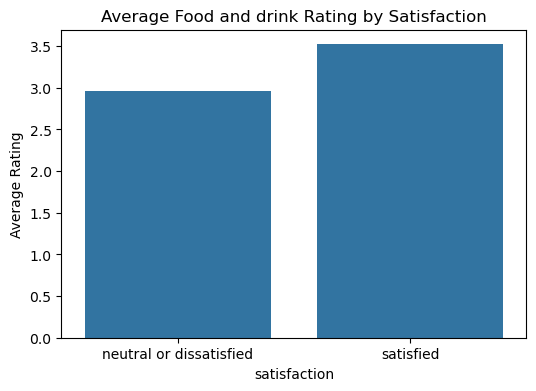

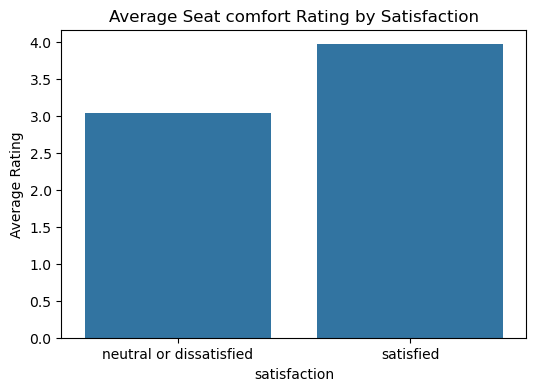

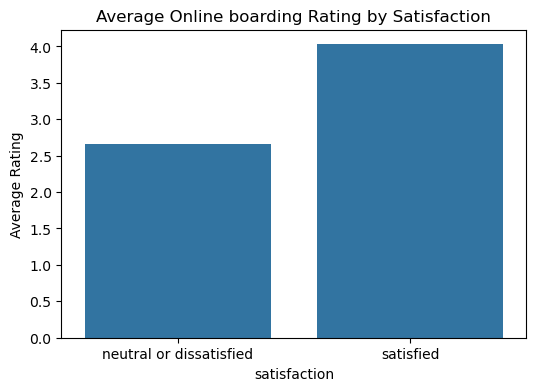

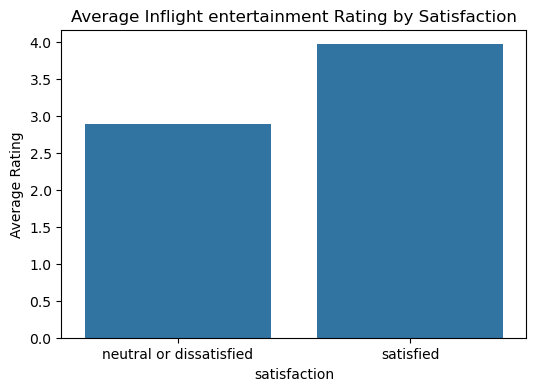

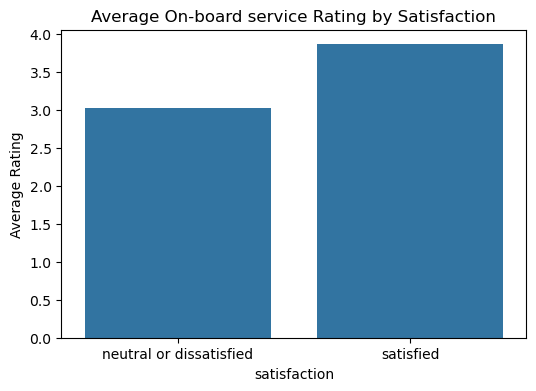

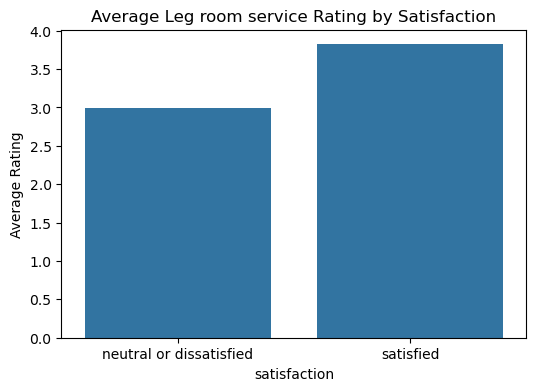

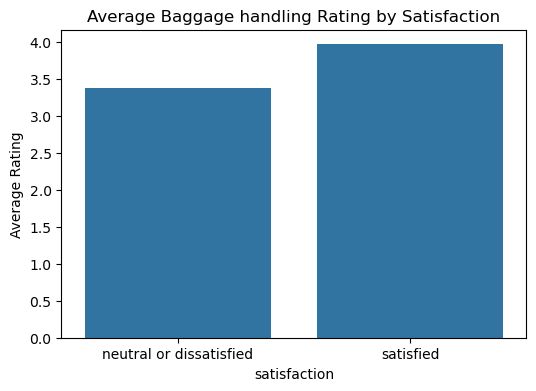

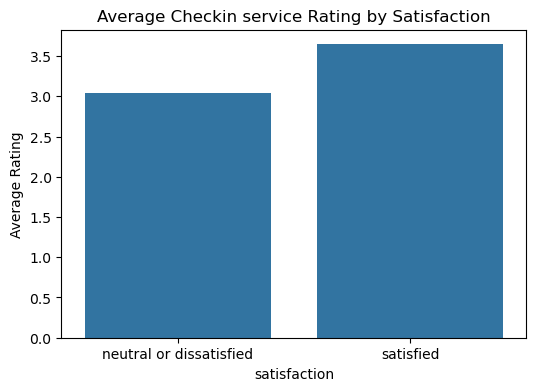

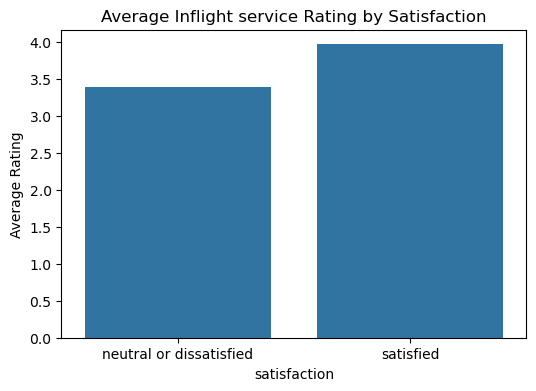

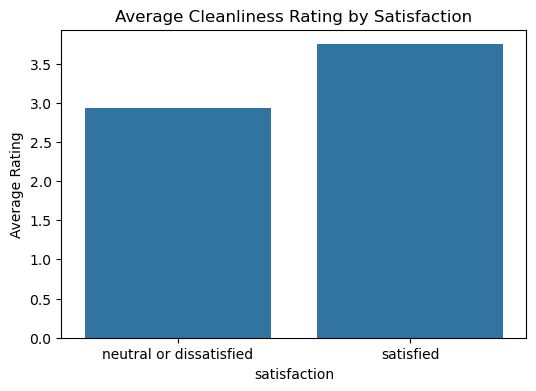

In [19]:
# Ordinal Survey Features vs. Satisfaction
ordinal_features = [
    'Inflight wifi service', 'Food and drink', 'Seat comfort',
    'Online boarding', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness'
]

for feature in ordinal_features:
    plt.figure(figsize = (6, 4))
    sns.barplot(data = df, x = 'satisfaction', y = feature, errorbar = None)
    plt.title(f"Average {feature} Rating by Satisfaction")
    plt.ylabel("Average Rating")

Text(0.5, 1.0, 'Correlation Heatmap')

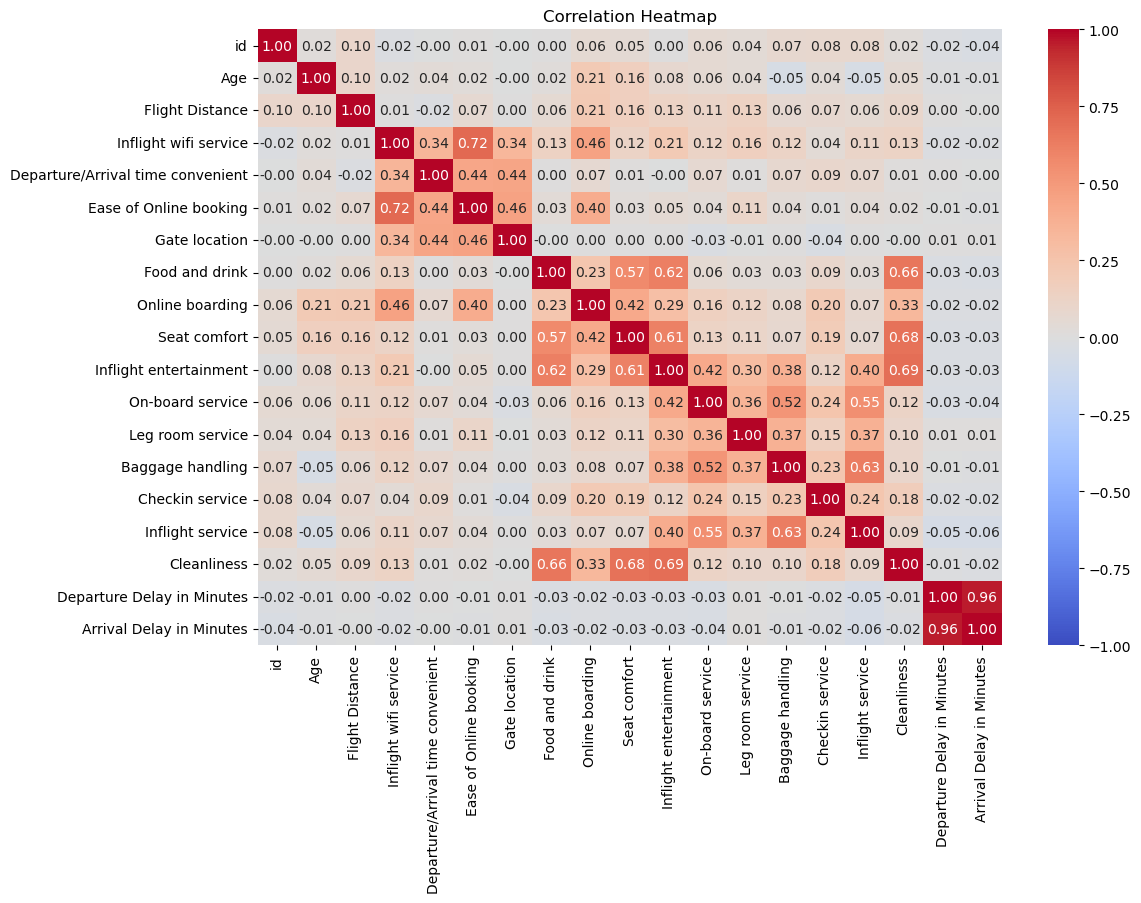

In [20]:
# Correlation Analysis
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(numeric_only = True), vmin = -1, vmax = 1, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title("Correlation Heatmap")

### Feature Engineering

In [22]:
# Dropping 'id'
df = df.drop(columns=['id'])

In [23]:
# Average service rating for overall ordinal features
df['Avg_Service_Rating'] = df[ordinal_features].mean(axis = 1)

In [24]:
# Delay difference
df['Delay_Diff_in_mins'] = df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']

In [25]:
# Convert categorical string values to lowercase before encoding
df['Gender'] = df['Gender'].str.lower()
df['Customer Type'] = df['Customer Type'].str.lower()
df['Type of Travel'] = df['Type of Travel'].str.lower()
df['Class'] = df['Class'].str.lower()

# Encoding categorical variables
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal customer': 0, 'loyal customer': 1})
df['Type of Travel'] = df['Type of Travel'].map({'personal travel': 0, 'business travel': 1})
df['Class'] = df['Class'].map({'eco': 0, 'eco plus': 1, 'business': 2})

In [26]:
# Encoding target to binary (0 = dissatisfied, 1 = satisfied)
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,
                                                   'satisfied':1})

In [27]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Avg_Service_Rating,Delay_Diff_in_mins
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,4.181818,-7.0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,2.181818,5.0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,4.181818,0.0
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,2.454545,-2.0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,3.636364,0.0


In [28]:
df.to_csv('cleaned_airline_passenger_satisfaction.csv', index = False)

print("✅ Cleaned dataset saved — shape:", df.shape)

✅ Cleaned dataset saved — shape: (103904, 25)
